## Лабораторная работа №1

### Задание 1: Найти набор данных (датасет) для классификации удовлетворяющий следующим условиям: более 10 000 строк, более 20 столбцов, разные типы в столбцах, обязательно наличие целевого признака (таргета).

### Titanic - Machine Learning from Disaster

### Задание 2: Провести классификацию найденного датасета, методом к- ближайших соседей. В формате Markdown писать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

### Загрузка и чтение данных 

In [12]:
import pandas as pd
import numpy as np
dataset_train = pd.read_csv("train.csv")
dataset_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Первых пять строк датасета:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

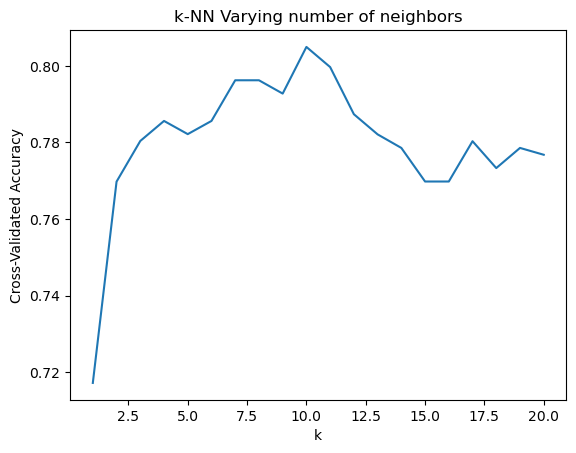


Final Accuracy with best k (10): 0.8181818181818182
Confusion Matrix:
[[75  5]
 [21 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        80
           1       0.89      0.67      0.76        63

    accuracy                           0.82       143
   macro avg       0.84      0.80      0.81       143
weighted avg       0.83      0.82      0.81       143



In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Загрузка данных с указанием правильного пути
data = pd.read_csv('train.csv')

# Просмотр первых строк датасета
print("Первых пять строк датасета:")
print(data.head())

# Проверка на наличие пропущенных значений
print("\nКоличество пропущенных значений в каждом столбце:")
print(data.isnull().sum())

# Предварительная обработка данных
## Удаляем строки с пропущенными значениями в 'Age' и 'Embarked'
data = data.dropna(subset=['Age', 'Embarked'])

## Заполняем пропуски в столбце 'Fare' медианой
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Преобразуем категориальные признаки в числовые
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Убедимся, что данные не пустые
print("\nКоличество строк и столбцов после предварительной обработки данных:")
print(data.shape)

# Выбираем целевую переменную и признаки
X = data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
y = data['Survived']

# Убедимся, что массивы X и y не пустые
print("\nФорма массива X:")
print(X.shape)
print("\nФорма массива y:")
print(y.shape)

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Проверка, что данные не пустые после разделения
print("\nФорма обучающего набора X_train:")
print(X_train.shape)
print("\nФорма тестового набора X_test:")
print(X_test.shape)

# Инициализация и обучение модели k-NN с начальным значением k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'\nInitial Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Перекрестная проверка и настройка гиперпараметров
k_values = list(range(1, 21))
cross_val_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cross_val_scores.append(scores.mean())

# Определяем лучшее значение k
best_k = k_values[np.argmax(cross_val_scores)]
print(f'\nBest k: {best_k}')

# График зависимости точности от k
plt.plot(k_values, cross_val_scores)
plt.xlabel('k')
plt.ylabel('Cross-Validated Accuracy')
plt.title('k-NN Varying number of neighbors')
plt.show()

# Финальное обучение и оценка модели с лучшим значением k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn.predict(X_test)

# Финальная оценка модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'\nFinal Accuracy with best k ({best_k}): {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
